In [5]:
import pandas as pd

In [6]:
arcs = pd.read_table('../data/ted_clean/protein_architectures.tsv')

In [7]:
features = pd.read_table('../data/ted_clean/mobidb_features_sequence.tsv')

/tmp/ipykernel_41600/2628805545.py:1: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  features = pd.read_table('../data/ted_clean/mobidb_features_sequence.tsv')


In [8]:
regions = (pd.read_table('../data/ted_clean/regions_with_dc_features.tsv')
          # .query('length >= 10')
          )

In [9]:
domains = pd.read_table('../data/ted_clean/ted_domains_sp.tsv')

In [10]:
regions['tid'] = regions.apply(lambda x: f"AF-{x.acc}-F1-model_v4_{x.feature}", 1)

In [11]:
print("Proteins not present in regions dataframe because they dont have mobidb disorder features",
len(domains[~domains.tid.isin(regions.tid)].drop_duplicates('acc')),sep="\n")

Proteins not present in regions dataframe because they dont have mobidb disorder features
3579


In [25]:
# Dominios que estan en features pero no estan en regions - Averiguar por que
domains[domains.acc.isin(features.acc) & ~(domains.tid.isin(regions.tid) )]

,tid,positions,level,acc,tednum,dom_start,dom_end,qscore,cath_label,qcat
8543,AF-A0A590UK83-F1-model_v4_TED02,78-107,medium,A0A590UK83,TED02,78,107,0.7106,1.20.5,B
55315,AF-A4VCL2-F1-model_v4_TED01,586-965,medium,A4VCL2,TED01,586,965,0.3690,-,Z
75833,AF-A6NGB0-F1-model_v4_TED02,307-339,medium,A6NGB0,TED02,307,339,0.6271,1.20.5,Z
219070,AF-G1SVB0-F1-model_v4_TED01,243-336,medium,G1SVB0,TED01,243,336,0.7769,3.30.300,B
219071,AF-G1SVB0-F1-model_v4_TED02,376-432,medium,G1SVB0,TED02,376,432,0.6389,3.30.300,Z
277646,AF-P13528-F1-model_v4_TED02,373-431,high,P13528,TED02,373,431,0.8758,1.10.10.60,A
319405,AF-P49842-F1-model_v4_TED02,297-365,medium,P49842,TED02,297,365,0.7698,1.10.10,B
500053,AF-Q5A109-F1-model_v4_TED02,161-193,medium,Q5A109,TED02,161,193,0.6778,2.20.70,Z
545405,AF-Q66PJ3-F1-model_v4_TED01,358-391,medium,Q66PJ3,TED01,358,391,0.1961,-,Z
545406,AF-Q66PJ3-F1-model_v4_TED02,394-421,medium,Q66PJ3,TED02,394,421,0.7159,1.20.5,B


In [12]:
# Work with protein domains present in regions/mobidb_features
domains = domains[domains.acc.isin(features.acc)]


In [13]:
regions['tidu'] = regions.tid + "_" + regions.start.astype(str)

Domain by QCat
qcat
A    689067
Z    219537
B     94512
Name: count, dtype: int64
1003116


<Axes: ylabel='count'>

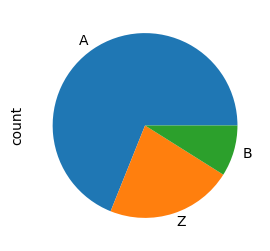

In [11]:
print("Domain by QCat")
print(domains.drop_duplicates('tid').qcat.value_counts())
print(len(domains.drop_duplicates('tid')))
domains.qcat.value_counts().plot.pie(figsize=(3,3))

In [14]:
regions = regions[(regions.tipo == "domain") | (regions.length >= 10)]

In [15]:
regions.drop_duplicates('tidu').tipo.value_counts()

tipo
domain           1222491
link              248038
Nter              235753
Cter              184193
internal_link     101703
Name: count, dtype: int64

In [16]:
regions.drop_duplicates('tidu').groupby('tipo')[['length','lite_dc']].agg(['mean','min','max']).round(2)

length            lite_dc          
                 mean min    max    mean  min  max
tipo                                              
Cter            65.88  10  12385    0.16  0.0  1.0
Nter            64.55  10   2281    0.12  0.0  1.0
domain         113.64   5    766    0.01  0.0  1.0
internal_link   40.57  10   2005    0.07  0.0  1.0
link            57.06  10   2236    0.05  0.0  1.0

In [15]:
regions.query('tipo == "link"').tid.value_counts()#.value_counts()

tid
AF-Q09056-F1-model_v4_TED02_link_TED01    3
AF-Q56RZ5-F1-model_v4_TED01_link_TED02    2
AF-Q9ST63-F1-model_v4_TED01_link_TED02    2
AF-Q5R533-F1-model_v4_TED01_link_TED02    2
AF-C6DFI3-F1-model_v4_TED01_link_TED02    2
                                         ..
AF-O61734-F1-model_v4_TED02_link_TED03    1
AF-O61735-F1-model_v4_TED02_link_TED03    1
AF-O61789-F1-model_v4_TED01_link_TED02    1
AF-O61820-F1-model_v4_TED01_link_TED02    1
AF-X5M8U1-F1-model_v4_TED03_link_TED04    1
Name: count, Length: 247494, dtype: int64

In [16]:
regions[regions.tid == "AF-Q9SR24-F1-model_v4_TED01_link_TED01"]

,acc,feature,start,end,lite_dc,th50_dc,afd_dc,lcd_dc,pdbd_dc,length,tipo,tid,tidu
2741124,Q9SR24,TED01_link_TED01,44,63,0.000000,0.800000,0.650000,0.0,0.0,20,internal_link,AF-Q9SR24-F1-model_v4_TED01_link_TED01,AF-Q9SR24-F1-model_v4_TED01_link_TED01_44
2741126,Q9SR24,TED01_link_TED01,87,100,0.000000,0.000000,0.000000,0.0,0.0,14,internal_link,AF-Q9SR24-F1-model_v4_TED01_link_TED01,AF-Q9SR24-F1-model_v4_TED01_link_TED01_87
2741128,Q9SR24,TED01_link_TED01,110,244,0.148148,0.474074,0.933333,0.0,0.0,135,internal_link,AF-Q9SR24-F1-model_v4_TED01_link_TED01,AF-Q9SR24-F1-model_v4_TED01_link_TED01_110
2741130,Q9SR24,TED01_link_TED01,306,376,0.000000,0.183099,0.957746,0.0,0.0,71,internal_link,AF-Q9SR24-F1-model_v4_TED01_link_TED01,AF-Q9SR24-F1-model_v4_TED01_link_TED01_306
2741132,Q9SR24,TED01_link_TED01,445,471,0.000000,0.000000,0.777778,0.0,0.0,27,internal_link,AF-Q9SR24-F1-model_v4_TED01_link_TED01,AF-Q9SR24-F1-model_v4_TED01_link_TED01_445
2741134,Q9SR24,TED01_link_TED01,479,552,0.000000,0.013514,0.000000,0.0,0.0,74,internal_link,AF-Q9SR24-F1-model_v4_TED01_link_TED01,AF-Q9SR24-F1-model_v4_TED01_link_TED01_479


In [17]:
arcs.lite_cat_10.str.contains("A1A").value_counts()

lite_cat_10
False    522033
True       2204
Name: count, dtype: int64

In [18]:
regions = regions.merge(arcs)

In [21]:
linkers = regiones[regiones.tipo.str.contains('link')]

In [22]:
linkers.tipo.value_counts()

tipo
link             248038
internal_link    101703
Name: count, dtype: int64

In [23]:
linkers.to_csv('../data/linkers.tsv', sep='\t', index=False)

In [23]:
regions[(
    regions.lite_cat_20.fillna("").str.contains("A1A") 
    #|(regions.lite_cat_20.fillna("") == "A1A" )
     | arcs.lite_cat_20.fillna("").str.contains("A2A") 
     | arcs.lite_cat_20.fillna("").str.contains("A3A") 

)].query('tipo == "internal_link"').sort_values('length')

,acc,feature,start,end,lite_dc,th50_dc,afd_dc,lcd_dc,pdbd_dc,length,tipo,tid,tidu,th50_cat_10,lite_cat_10,th50_cat_20,lite_cat_20
1511108,Q6FKC6,TED01_link_TED01,197,206,0.000000,0.000000,0.000000,0.000000,0.0,10,internal_link,AF-Q6FKC6-F1-model_v4_TED01_link_TED01,AF-Q6FKC6-F1-model_v4_TED01_link_TED01_197,_A1A0AA_,_A1A0AA_,_A1AA_,_A1AA_
636648,O05458,TED01_link_TED01,261,270,0.000000,1.000000,0.000000,0.000000,0.0,10,internal_link,AF-O05458-F1-model_v4_TED01_link_TED01,AF-O05458-F1-model_v4_TED01_link_TED01_261,_A1A1A_,_A1A0A_,_A1AA_,_A1AA_
1022925,Q07E15,TED02_link_TED02,1031,1040,0.000000,0.000000,0.000000,0.000000,0.0,10,internal_link,AF-Q07E15-F1-model_v4_TED02_link_TED02,AF-Q07E15-F1-model_v4_TED02_link_TED02_1031,_A1A0Z0Z0Z0B0B_,_A1A0Z0Z0Z0B0B_,_A1A0ZZZ0BB_,_A1A0ZZZ0BB_
440251,B5RMG2,TED02_link_TED02,100,109,0.000000,0.000000,0.000000,0.000000,0.0,10,internal_link,AF-B5RMG2-F1-model_v4_TED02_link_TED02,AF-B5RMG2-F1-model_v4_TED02_link_TED02_100,_Z1A0AA0AA,_Z0A0AA0AA,ZAAAAA,ZAAAAA
1161597,Q28838,TED01_link_TED01,190,199,0.000000,1.000000,1.000000,0.000000,0.0,10,internal_link,AF-Q28838-F1-model_v4_TED01_link_TED01,AF-Q28838-F1-model_v4_TED01_link_TED01_190,_A1A1A,_A0A1A,_AA1A,_AA1A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759314,P0CP37,TED02_link_TED02,469,798,0.251515,0.360606,0.872727,0.000000,0.0,330,internal_link,AF-P0CP37-F1-model_v4_TED02_link_TED02,AF-P0CP37-F1-model_v4_TED02_link_TED02_469,_A1A2AB0B2B0ZA0A0A_,_A1A2AB0B0B0ZA0A0A_,_A1A2AB0B2BZA0A0A_,_A1A2AB0B0BZA0A0A_
1711648,Q8IZJ3,TED02_link_TED02,225,584,0.000000,0.072222,0.077778,0.000000,0.0,360,internal_link,AF-Q8IZJ3-F1-model_v4_TED02_link_TED02,AF-Q8IZJ3-F1-model_v4_TED02_link_TED02_225,_AZ0Z0ZA1A0A0A0A0A1A0Z_,_AZ0Z0ZA0A0A0A0A0A1A0Z_,_AZ0Z0ZAA0AA0A1A0Z_,_AZ0Z0ZAA0AA0A1A0Z_
1596847,Q7S9J6,TED03_link_TED03,591,1017,0.096019,0.241218,0.826698,0.000000,0.0,427,internal_link,AF-Q7S9J6-F1-model_v4_TED03_link_TED03,AF-Q7S9J6-F1-model_v4_TED03_link_TED03_591,_A1AAB0B00Z0A1A_,_A1AAB0B00Z0A1A_,_A1AABB00Z0AA_,_A1AABB00Z0AA_
1324557,Q4WC55,TED01_link_TED01,165,601,0.000000,0.034325,0.000000,0.000000,0.0,437,internal_link,AF-Q4WC55-F1-model_v4_TED01_link_TED01,AF-Q4WC55-F1-model_v4_TED01_link_TED01_165,_A0AA0A1A_,_A0AA0A1A_,_A0AA0A1A_,_A0AA0A1A_


In [20]:
regions[(
    regions.lite_cat_20.fillna("").str.contains("A1A") 
    #|(regions.lite_cat_20.fillna("") == "A1A" )
     | arcs.lite_cat_20.fillna("").str.contains("A2A") 
     | arcs.lite_cat_20.fillna("").str.contains("A3A") 

)].query('tipo == "internal_link"').sort_values('length')

,acc,feature,start,end,lite_dc,th50_dc,afd_dc,lcd_dc,pdbd_dc,length,tipo,tid,tidu,th50_cat_10,lite_cat_10,th50_cat_20,lite_cat_20
1511108,Q6FKC6,TED01_link_TED01,197,206,0.000000,0.000000,0.000000,0.000000,0.0,10,internal_link,AF-Q6FKC6-F1-model_v4_TED01_link_TED01,AF-Q6FKC6-F1-model_v4_TED01_link_TED01_197,_A1A0AA_,_A1A0AA_,_A1AA_,_A1AA_
636648,O05458,TED01_link_TED01,261,270,0.000000,1.000000,0.000000,0.000000,0.0,10,internal_link,AF-O05458-F1-model_v4_TED01_link_TED01,AF-O05458-F1-model_v4_TED01_link_TED01_261,_A1A1A_,_A1A0A_,_A1AA_,_A1AA_
1022925,Q07E15,TED02_link_TED02,1031,1040,0.000000,0.000000,0.000000,0.000000,0.0,10,internal_link,AF-Q07E15-F1-model_v4_TED02_link_TED02,AF-Q07E15-F1-model_v4_TED02_link_TED02_1031,_A1A0Z0Z0Z0B0B_,_A1A0Z0Z0Z0B0B_,_A1A0ZZZ0BB_,_A1A0ZZZ0BB_
440251,B5RMG2,TED02_link_TED02,100,109,0.000000,0.000000,0.000000,0.000000,0.0,10,internal_link,AF-B5RMG2-F1-model_v4_TED02_link_TED02,AF-B5RMG2-F1-model_v4_TED02_link_TED02_100,_Z1A0AA0AA,_Z0A0AA0AA,ZAAAAA,ZAAAAA
1161597,Q28838,TED01_link_TED01,190,199,0.000000,1.000000,1.000000,0.000000,0.0,10,internal_link,AF-Q28838-F1-model_v4_TED01_link_TED01,AF-Q28838-F1-model_v4_TED01_link_TED01_190,_A1A1A,_A0A1A,_AA1A,_AA1A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759314,P0CP37,TED02_link_TED02,469,798,0.251515,0.360606,0.872727,0.000000,0.0,330,internal_link,AF-P0CP37-F1-model_v4_TED02_link_TED02,AF-P0CP37-F1-model_v4_TED02_link_TED02_469,_A1A2AB0B2B0ZA0A0A_,_A1A2AB0B0B0ZA0A0A_,_A1A2AB0B2BZA0A0A_,_A1A2AB0B0BZA0A0A_
1711648,Q8IZJ3,TED02_link_TED02,225,584,0.000000,0.072222,0.077778,0.000000,0.0,360,internal_link,AF-Q8IZJ3-F1-model_v4_TED02_link_TED02,AF-Q8IZJ3-F1-model_v4_TED02_link_TED02_225,_AZ0Z0ZA1A0A0A0A0A1A0Z_,_AZ0Z0ZA0A0A0A0A0A1A0Z_,_AZ0Z0ZAA0AA0A1A0Z_,_AZ0Z0ZAA0AA0A1A0Z_
1596847,Q7S9J6,TED03_link_TED03,591,1017,0.096019,0.241218,0.826698,0.000000,0.0,427,internal_link,AF-Q7S9J6-F1-model_v4_TED03_link_TED03,AF-Q7S9J6-F1-model_v4_TED03_link_TED03_591,_A1AAB0B00Z0A1A_,_A1AAB0B00Z0A1A_,_A1AABB00Z0AA_,_A1AABB00Z0AA_
1324557,Q4WC55,TED01_link_TED01,165,601,0.000000,0.034325,0.000000,0.000000,0.0,437,internal_link,AF-Q4WC55-F1-model_v4_TED01_link_TED01,AF-Q4WC55-F1-model_v4_TED01_link_TED01_165,_A0AA0A1A_,_A0AA0A1A_,_A0AA0A1A_,_A0AA0A1A_


In [22]:
regions[(
    regions.lite_cat_20.fillna("").str.contains("A1A") 
    #|
    #(regions.lite_cat_20.fillna("") == "A1A" )
     | arcs.lite_cat_20.fillna("").str.contains("A2A") 
     | arcs.lite_cat_20.fillna("").str.contains("A3A") 

)].query('tipo == "link"').sort_values('length')

,acc,feature,start,end,lite_dc,th50_dc,afd_dc,lcd_dc,pdbd_dc,length,tipo,tid,tidu,th50_cat_10,lite_cat_10,th50_cat_20,lite_cat_20
592054,C8V3W5,TED01_link_TED02,156,165,0.000000,0.000000,0.000000,0.000000,0.0,10,link,AF-C8V3W5-F1-model_v4_TED01_link_TED02,AF-C8V3W5-F1-model_v4_TED01_link_TED02_156,_Z0A0AAA1AA,_Z0A0AAA1AA,_ZAAAA1A,_ZAAAA1A
1814703,Q96PE1,TED03_link_TED04,415,424,0.000000,0.000000,0.000000,0.000000,0.0,10,link,AF-Q96PE1-F1-model_v4_TED03_link_TED04,AF-Q96PE1-F1-model_v4_TED03_link_TED04_415,_A2AAZ0Z0BA1AA0A0A2A_,_A0AAZ0Z0BA1AA0A0A0A_,_AAZBA1AAAA2A_,_AAZBA1AAAA0A_
1571879,Q755C5,TED01_link_TED02,340,349,0.000000,0.000000,0.000000,0.000000,0.0,10,link,AF-Q755C5-F1-model_v4_TED01_link_TED02,AF-Q755C5-F1-model_v4_TED01_link_TED02_340,_A0A0A1A,_A0A0A1A,_0AA1A,_0AA1A
1101347,Q17886,TED01_link_TED02,226,235,0.000000,0.000000,0.000000,0.000000,0.0,10,link,AF-Q17886-F1-model_v4_TED01_link_TED02,AF-Q17886-F1-model_v4_TED01_link_TED02_226,_A1A0Z_,_A1A0Z_,_A1AZ_,_A1AZ_
149905,A5E987,TED01_link_TED02,181,190,0.000000,0.000000,0.000000,0.000000,0.0,10,link,AF-A5E987-F1-model_v4_TED01_link_TED02,AF-A5E987-F1-model_v4_TED01_link_TED02_181,A0A_,A0A_,AA,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230136,Q32S24,TED01_link_TED02,223,1555,0.967742,0.977494,0.990998,0.111028,0.0,1333,link,AF-Q32S24-F1-model_v4_TED01_link_TED02,AF-Q32S24-F1-model_v4_TED01_link_TED02_223,_A1A,_A1A,_A1A,_A1A
1452491,Q60467,TED01_link_TED02,256,1622,0.951719,0.977323,0.990490,0.133138,0.0,1367,link,AF-Q60467-F1-model_v4_TED01_link_TED02,AF-Q60467-F1-model_v4_TED01_link_TED02_256,_A1A,_A1A,_A1A,_A1A
798306,P20908,TED01_link_TED02,249,1616,0.935673,0.980263,0.992690,0.154240,0.0,1368,link,AF-P20908-F1-model_v4_TED01_link_TED02,AF-P20908-F1-model_v4_TED01_link_TED02_249,_A1A,_A1A,_A1A,_A1A
1880620,Q9JI03,TED01_link_TED02,257,1683,0.914506,0.930624,0.947442,0.136650,0.0,1427,link,AF-Q9JI03-F1-model_v4_TED01_link_TED02,AF-Q9JI03-F1-model_v4_TED01_link_TED02_257,_A1A,_A1A,_A1A,_A1A


In [100]:
regions.query('acc == "B7LGT4"')

,acc,feature,start,end,lite_dc,th50_dc,afd_dc,lcd_dc,pdbd_dc,length,tipo,tid,th50_cat_10,lite_cat_10,th50_cat_20,lite_cat_20
473132,B7LGT4,N-terminus_link_TED01,1,14,0.000000,0.428571,1.000000,0.0,0.0,14,Nter,AF-B7LGT4-F1-model_v4_N-terminus_link_TED01,_A1A,_A2A,A1A,A2A
473133,B7LGT4,TED01,15,97,0.000000,0.000000,0.048193,0.0,0.0,83,domain,AF-B7LGT4-F1-model_v4_TED01,_A1A,_A2A,A1A,A2A
473134,B7LGT4,TED01_link_TED02,98,124,0.851852,1.000000,1.000000,0.0,0.0,27,link,AF-B7LGT4-F1-model_v4_TED01_link_TED02,_A1A,_A2A,A1A,A2A
473135,B7LGT4,TED02,125,228,0.000000,0.009615,0.028846,0.0,0.0,104,domain,AF-B7LGT4-F1-model_v4_TED02,_A1A,_A2A,A1A,A2A


In [107]:
regions[(
    regions.lite_cat_20.fillna("").str.contains("_A_") 
    #|
    #(regions.lite_cat_20.fillna("") == "A1A" )
    # | arcs.lite_cat_20.fillna("").str.contains("A2A") 
    # | arcs.lite_cat_20.fillna("").str.contains("A3A") 

)].query('afd_dc >= .8')

,acc,feature,start,end,lite_dc,th50_dc,afd_dc,lcd_dc,pdbd_dc,length,tipo,tid,th50_cat_10,lite_cat_10,th50_cat_20,lite_cat_20
806,A0A072VHJ1,TED01_link_C-terminus,434,481,0.000000,0.333333,0.875000,0.000000,0.0,48,Cter,AF-A0A072VHJ1-F1-model_v4_TED01_link_C-terminus,_A_,_A_,_A_,_A_
908,A0A075B734,N-terminus_link_TED01,1,21,0.000000,0.666667,1.000000,0.000000,0.0,21,Nter,AF-A0A075B734-F1-model_v4_N-terminus_link_TED01,_A_,_A_,_A_,_A_
910,A0A075B734,TED01_link_C-terminus,283,346,0.000000,0.093750,0.984375,0.000000,0.0,64,Cter,AF-A0A075B734-F1-model_v4_TED01_link_C-terminus,_A_,_A_,_A_,_A_
1109,A0A084API2,N-terminus_link_TED01,1,52,0.750000,0.826923,0.884615,0.557692,0.0,52,Nter,AF-A0A084API2-F1-model_v4_N-terminus_link_TED01,_A_,_A_,_A_,_A_
1325,A0A087WUV0,N-terminus_link_TED01,1,220,0.222727,0.459091,0.945455,0.000000,0.0,220,Nter,AF-A0A087WUV0-F1-model_v4_N-terminus_link_TED01,_A_,_A_,_A_,_A_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978774,W7MGR9,N-terminus_link_TED01,1,244,0.524590,0.807377,0.975410,0.000000,0.0,244,Nter,AF-W7MGR9-F1-model_v4_N-terminus_link_TED01,_A_,_A_,_A_,_A_
1978776,W7MGR9,TED01_link_C-terminus,417,460,0.863636,0.931818,0.840909,0.000000,0.0,44,Cter,AF-W7MGR9-F1-model_v4_TED01_link_C-terminus,_A_,_A_,_A_,_A_
1979015,X1WER2,TED01_link_C-terminus,319,398,0.000000,0.550000,0.987500,0.000000,0.0,80,Cter,AF-X1WER2-F1-model_v4_TED01_link_C-terminus,_A_,_A_,_A_,_A_
1979098,X5HYT8,N-terminus_link_TED01,1,90,0.244444,0.688889,0.844444,0.000000,0.0,90,Nter,AF-X5HYT8-F1-model_v4_N-terminus_link_TED01,_A_,_A_,_A_,_A_


In [24]:
regions

,acc,feature,start,end,lite_dc,th50_dc,afd_dc,lcd_dc,pdbd_dc,length,tipo,tid,tidu,th50_cat_10,lite_cat_10,th50_cat_20,lite_cat_20
0,A0A009IHW8,TED01,2,21,0.000000,0.300000,0.000000,0.0,0.0,20,domain,AF-A0A009IHW8-F1-model_v4_TED01,AF-A0A009IHW8-F1-model_v4_TED01_2,ZZ0A,ZZ0A,ZZ0A,ZZ0A
1,A0A009IHW8,TED01,29,69,0.000000,0.219512,0.024390,0.0,0.0,41,domain,AF-A0A009IHW8-F1-model_v4_TED01,AF-A0A009IHW8-F1-model_v4_TED01_29,ZZ0A,ZZ0A,ZZ0A,ZZ0A
2,A0A009IHW8,TED01_link_TED02,70,133,0.000000,0.000000,0.703125,0.0,0.0,64,link,AF-A0A009IHW8-F1-model_v4_TED01_link_TED02,AF-A0A009IHW8-F1-model_v4_TED01_link_TED02_70,ZZ0A,ZZ0A,ZZ0A,ZZ0A
3,A0A009IHW8,TED02,134,266,0.000000,0.000000,0.000000,0.0,0.0,133,domain,AF-A0A009IHW8-F1-model_v4_TED02,AF-A0A009IHW8-F1-model_v4_TED02_134,ZZ0A,ZZ0A,ZZ0A,ZZ0A
4,A0A023FBW4,N-terminus_link_TED01,1,42,0.000000,0.333333,1.000000,0.0,0.0,42,Nter,AF-A0A023FBW4-F1-model_v4_N-terminus_link_TED01,AF-A0A023FBW4-F1-model_v4_N-terminus_link_TED01_1,_Z_,_Z_,_Z,_Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992173,X5M8U1,TED03_link_TED03,531,553,0.913043,1.000000,0.869565,0.0,0.0,23,internal_link,AF-X5M8U1-F1-model_v4_TED03_link_TED03,AF-X5M8U1-F1-model_v4_TED03_link_TED03_531,_AAAA0A01A0A_,_AAAA0A01A0A_,_AAAAA01A0A_,_AAAAA01A0A_
1992174,X5M8U1,TED03,554,816,0.000000,0.019011,0.000000,0.0,0.0,263,domain,AF-X5M8U1-F1-model_v4_TED03,AF-X5M8U1-F1-model_v4_TED03_554,_AAAA0A01A0A_,_AAAA0A01A0A_,_AAAAA01A0A_,_AAAAA01A0A_
1992175,X5M8U1,TED03_link_TED04,817,870,0.000000,0.000000,0.129630,0.0,0.0,54,link,AF-X5M8U1-F1-model_v4_TED03_link_TED04,AF-X5M8U1-F1-model_v4_TED03_link_TED04_817,_AAAA0A01A0A_,_AAAA0A01A0A_,_AAAAA01A0A_,_AAAAA01A0A_
1992176,X5M8U1,TED04,871,1062,0.000000,0.020833,0.000000,0.0,0.0,192,domain,AF-X5M8U1-F1-model_v4_TED04,AF-X5M8U1-F1-model_v4_TED04_871,_AAAA0A01A0A_,_AAAA0A01A0A_,_AAAAA01A0A_,_AAAAA01A0A_


In [1]:
import pandas as pd

In [2]:
regiones = pd.read_table('../data/ted_clean/regions_with_parch_fnote.tsv')

In [3]:
linkers = regiones[regiones.tipo.str.contains('link')]

In [4]:
linkers.tipo.value_counts()

tipo
link             248038
internal_link    101703
Name: count, dtype: int64